In [1]:
import numpy as np
import matplotlib.pylab as plt
import mistree as mist
import mistreedev as mistdev

In [6]:
size = 100
x, y = mist.get_levy_flight(size, mode='2D', periodic=False)

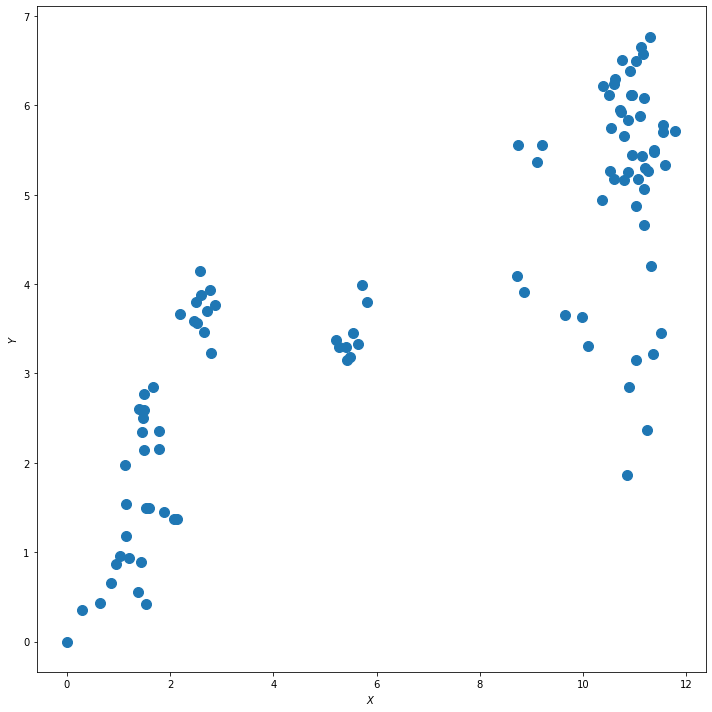

In [7]:
plt.figure(figsize=(10., 10.))
plt.plot(x, y, 'o', markersize=10., alpha=1.)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
#plt.xlim(0., 75.)
#plt.ylim(0., 75.)
plt.tight_layout()
plt.show()

In [8]:
mst = mist.GetMST(x=x, y=y)
d, l, b, s, lind, bind = mst.get_stats(include_index=True, sub_divisions=1)

/Users/krishna/opt/miniconda2/envs/py3/lib/python3.8/site-packages/mistree/mst/branches.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  branch_index.append(np.ndarray.tolist(np.ndarray.flatten(np.array(_twig))))
/Users/krishna/opt/miniconda2/envs/py3/lib/python3.8/site-packages/mistree/mst/branches.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  branch_index = [np.ndarray.tolist(np.hstack(np.array(branch_index[i]))) for i in range(0, len(branch_index))]


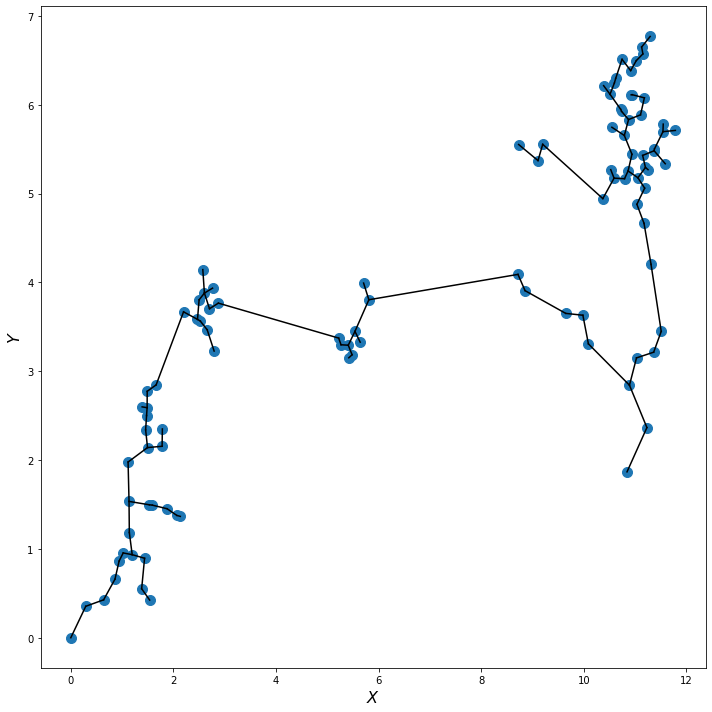

In [10]:
plt.figure(figsize=(10., 10.))

# plotting nodes:
plt.plot(x, y, 'o', markersize=10., alpha=1.)

# plotting MST edges:
plt.plot([x[lind[0]], x[lind[1]]],
         [y[lind[0]], y[lind[1]]],
         color='k')

plt.xlabel(r'$X$', size=16)
plt.ylabel(r'$Y$', size=16)
plt.tight_layout()
plt.show()

In [12]:
l_threshold = 0.25

# keep only edges below l_threshold
c = np.where(l <= l_threshold)[0]

# keep only edges above l_threshold
#c = np.where(l > l_threshold)[0]

# creating new index of edges
lind_new = [lind[0][c], lind[1][c]]

print('Edges that satisfy condition:', len(lind_new[0]), 'out of', len(lind[0]))

Edges that satisfy condition: 61 out of 99


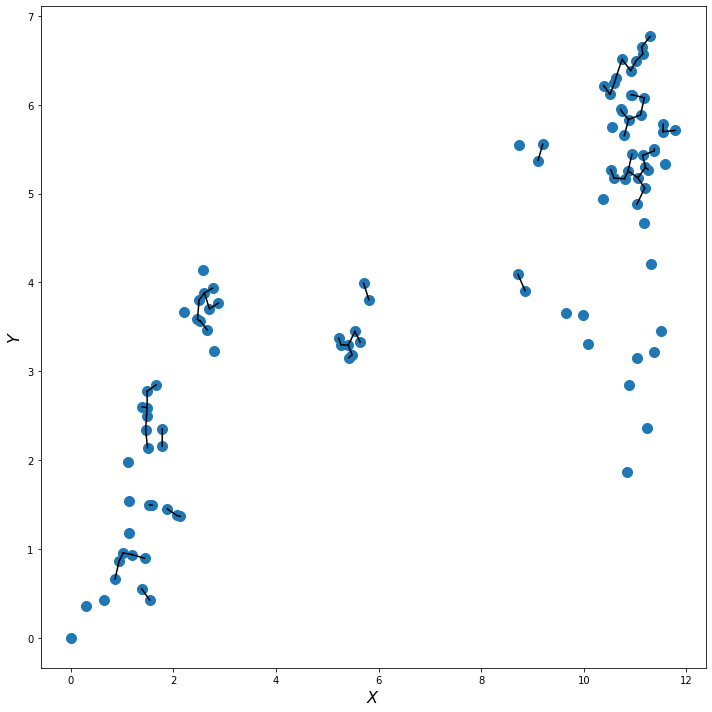

In [13]:
plt.figure(figsize=(10., 10.))

# plotting nodes:
plt.plot(x, y, 'o', markersize=10., alpha=1.)

# plotting MST edges:
plt.plot([x[lind[0][c]], x[lind[1][c]]],
         [y[lind[0][c]], y[lind[1][c]]],
         color='k')

plt.xlabel(r'$X$', size=16)
plt.ylabel(r'$Y$', size=16)
plt.tight_layout()
plt.show()

In [16]:
friends = mistdev.find_friends(len(x), lind_new)
groups = mistdev.friends2groups(friends)
print('Number of groups:', len(groups))

Number of groups: 15


/Users/krishna/opt/miniconda2/envs/py3/lib/python3.8/site-packages/mistreedev-1.0.0-py3.8.egg/mistreedev/structurefinder.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/krishna/opt/miniconda2/envs/py3/lib/python3.8/site-packages/mistreedev-1.0.0-py3.8.egg/mistreedev/structurefinder.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [17]:
friends_in_groups = mistdev.get_friends_in_groups(friends, groups)
edge_end1, edge_end2 = mistdev.get_group_edges(groups, friends_in_groups)

In [18]:
x_groups = mistdev.get_group_mean(groups, x)
y_groups = mistdev.get_group_mean(groups, y)

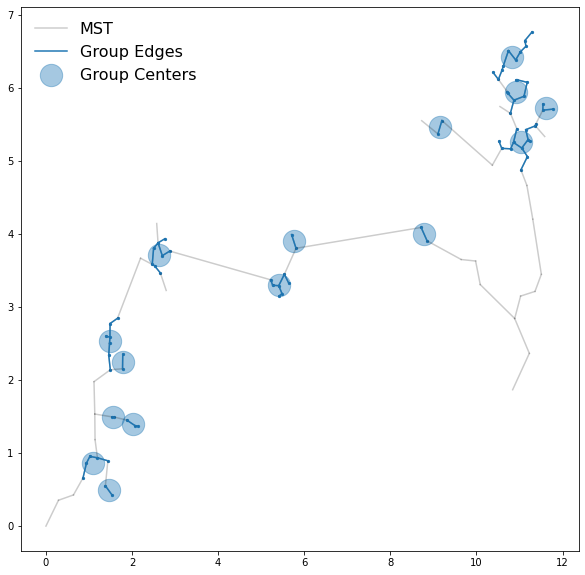

In [19]:
plt.figure(figsize=(10, 10))
plt.scatter(x_groups, y_groups, s=500, alpha=0.4, label='Group Centers')
plt.plot([x[lind[0]], x[lind[1]]], [y[lind[0]], y[lind[1]]], color='k', alpha=0.2)
for which_group in range(0, len(groups)):
    plt.scatter(x[groups[which_group]], y[groups[which_group]], color='C0', s=5)
    for i in range(0, len(edge_end1[which_group])):
        for j in range(0, len(edge_end2[which_group][i])):
            plt.plot([x[edge_end1[which_group][i]], x[edge_end2[which_group][i][j]]], [y[edge_end1[which_group][i]], y[edge_end2[which_group][i][j]]], color='C0')
plt.plot([], [], color='k', alpha=0.2, label='MST')
plt.plot([], [], color='C0', label='Group Edges')
plt.legend(loc='best', fontsize=16, frameon=False)
plt.show()

In [ ]:
"""class TreeStructure:
    
    def __init__(self):
        self.Npoints = None
        self.edge_index = None
        self.edge_length = None
        
    def set_tree(self, Npoints, edge_index, edge_length):
        assert isinstance(Npoints, int), 'Npoints must be an integer.'
        self.Npoints = Npoints
        self.edge_index = edge_index
        self.edge_length = edge_length
        
    def group(self, edge_length_min=None, edge_length_max=None):
        if edge_length_min is None and edge_length_max is None:
            assert len(self.edge_length) == len(self.edge_length), "Edge length conditions are both None."
        elif edge_length_max is None:
            condition = np.where((self.edge_length >= edge_length_min))[0]
        elif edge_length_min is None:
            condition = np.where((self.edge_length < edge_length_max))[0]
        else:
            condition = np.where((self.edge_length >= edge_length_min) & (self.edge_length < edge_length_max))[0]
        assert len(condition) == len(self.edge_length), "Tree is unaltered by conditions."
        new_edge_index = [self.edge_index[0][condition], self.edge_index[1][condition]]
        
        
    def clean(self):
        self.__init__()
"""